<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/13cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import os 

def reset_graph(seed=42):
  tf.reset_default_graph() 
  tf.set_random_seed(seed) 
  np.random.seed(seed) 
  
%matplotlib inline 
import matplotlib 
import matplotlib.pyplot as plt 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
def plot_image(image):
  plt.imshow(image,cmap="gray",interpolation="nearest") 
  plt.axis("off") 
  
def plot_color_image(image): 
  plt.imshow(image.astype(np.uint8),interpolation="nearest") 
  plt.axis("off") 

In [0]:
import tensorflow as tf 

In [0]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") 
flower = load_sample_image("flower.jpg") 
image = china[150:220,130:250]
height, width, channels = image.shape

image_grayscale = image.mean(axis=2).astype(np.float32) 
images = image_grayscale.reshape(1,height,width,1) 


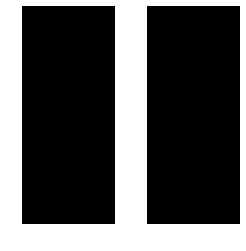

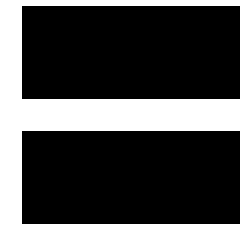

In [5]:
fmap = np.zeros(shape=(7,7,1,2),dtype=np.float32) 
fmap[:,3,0,0] =1 
fmap[3,:,0,1] = 1 
plot_image(fmap[:,:,0,0]) 
plt.show() 
plot_image(fmap[:,:,0,1]) 
plt.show() 

In [0]:
reset_graph() 

x = tf.placeholder(tf.float32,shape=(None,height,width,1)) 
feature_maps = tf.constant(fmap) 
convolution = tf.nn.conv2d(x,feature_maps,strides=[1,1,1,1],padding="SAME") 




In [0]:
with tf.Session() as sess: 
  output = convolution.eval(feed_dict={x:images}) 

Saving figure china_original


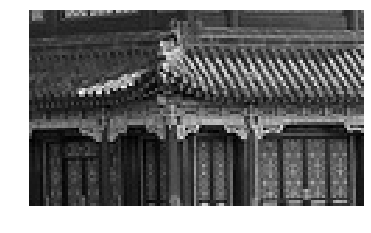

In [8]:
plot_image(images[0,:,:,0]) 
save_fig("china_original",tight_layout=False) 
plt.show() 

Saving figure china_vertical


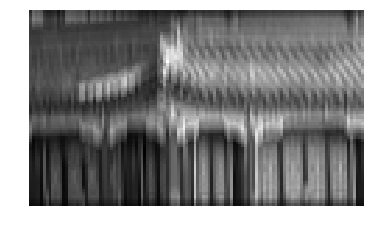

In [9]:
plot_image(output[0,:,:,0]) 
save_fig("china_vertical",tight_layout=False) 
plt.show() 

Saving figure china_horizontal


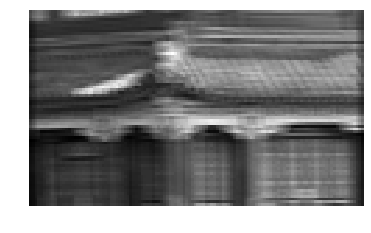

In [10]:
plot_image(output[0,:,:,1]) 
save_fig("china_horizontal",tight_layout=False) 
plt.show() 

In [0]:
import numpy as np 
from sklearn.datasets import load_sample_images 

china = load_sample_image("china.jpg") 
flower = load_sample_image("flower.jpg") 
dataset = np.array([china,flower],dtype=np.float32) 
batch_size, height,width,channels = dataset.shape 


filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32) 
filters[:,3,:,0] = 1 
filters[3,:,:,1] = 1 

x = tf.placeholder(tf.float32,shape=(None,height,width,channels)) 

convolution = tf.nn.conv2d(x, filters,strides=[1,2,2,1],padding="SAME") 


with tf.Session() as sess: 
  #output = sess.run(convolution,feed_dict={x:dataset}) 
  output = convolution.eval(feed_dict={x:dataset}) 
  

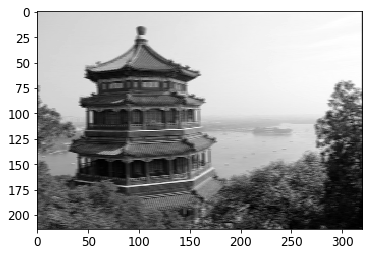

In [17]:
plt.imshow(output[0,:,:,1],cmap="gray") 
plt.show() 

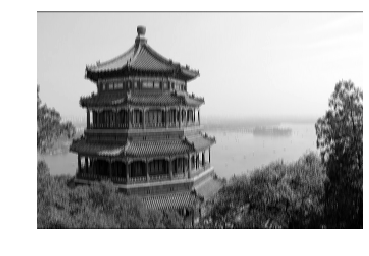

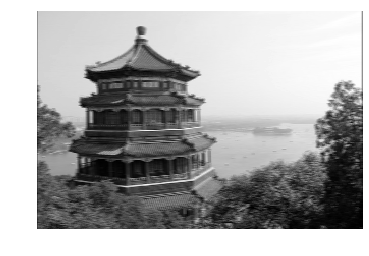

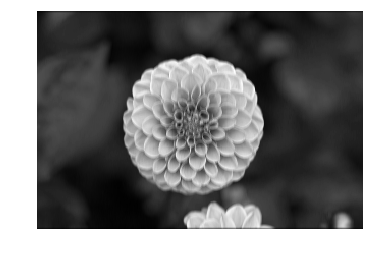

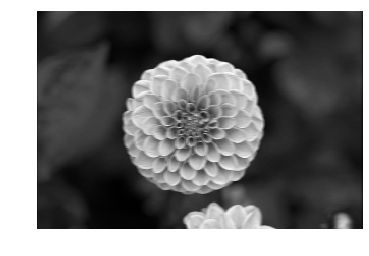

In [18]:
for image_index in (0,1):
  for feature_map_index in (0,1): 
    plot_image(output[image_index,:,:,feature_map_index]) 
    plt.show() 

In [19]:
reset_graph() 

x = tf.placeholder(shape=(None,height,width,channels),dtype=tf.float32) 
conv = tf.layers.conv2d(x,filters=2,kernel_size=7,strides=[2,2],padding="SAME") 

W0721 18:13:25.584659 140560168486784 deprecation.py:323] From <ipython-input-19-4d84cedbeb79>:4: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0721 18:13:25.600571 140560168486784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
init = tf.global_variables_initializer() 

with tf.Session() as sess: 
  init.run() 
  output = sess.run(conv,feed_dict={x:dataset}) 

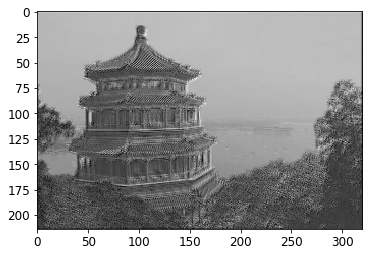

In [21]:
plt.imshow(output[0,:,:,1],cmap="gray") 
plt.show() 

In [22]:
reset_graph() 

filter_primes = np.array([2.,3.,5.,7.,11.,13.],dtype=np.float32) 
x = tf.constant(np.arange(1,13+1,dtype=np.float32).reshape([1,1,13,1])) 
filters = tf.constant(filter_primes.reshape(1,6,1,1)) 

valid_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding='VALID') 
same_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding='SAME') 

with tf.Session() as sess: 
  print(valid_conv.eval())
  print(same_conv.eval())

[[[[184.]
   [389.]]]]
[[[[143.]
   [348.]
   [204.]]]]


In [0]:
batch_size,height,width,channels = dataset.shape 

filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32) 
filters[:,3,:,0] = 1 
filters[3,:,:,1] = 1 

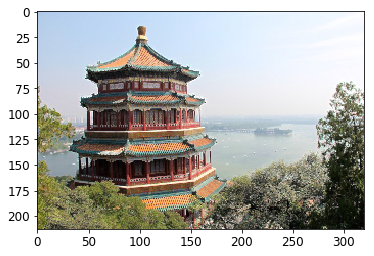

In [25]:
x = tf.placeholder(tf.float32,shape=(None,height,width,channels)) 

max_pool = tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID") 

with tf.Session() as sess: 
  output = sess.run(max_pool,feed_dict={x:dataset}) 
  
plt.imshow(output[0].astype(np.uint8)) 
plt.show() 

Saving figure china_original


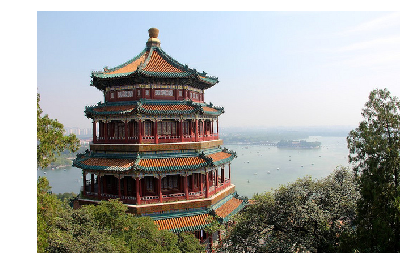

Saving figure china_max_pool


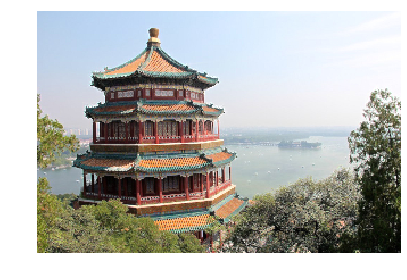

In [26]:
plot_color_image(dataset[0]) 
save_fig("china_original") 
plt.show() 

plot_color_image(output[0]) 
save_fig("china_max_pool")
plt.show() 